<a href="https://colab.research.google.com/github/ashish270505/External/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Mall_Customers.csv')

In [ ]:
print(data.head())
print(data.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

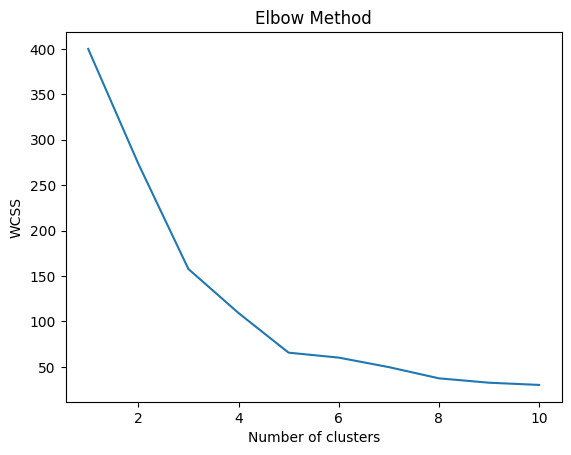

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

data['Cluster'] = kmeans.labels_

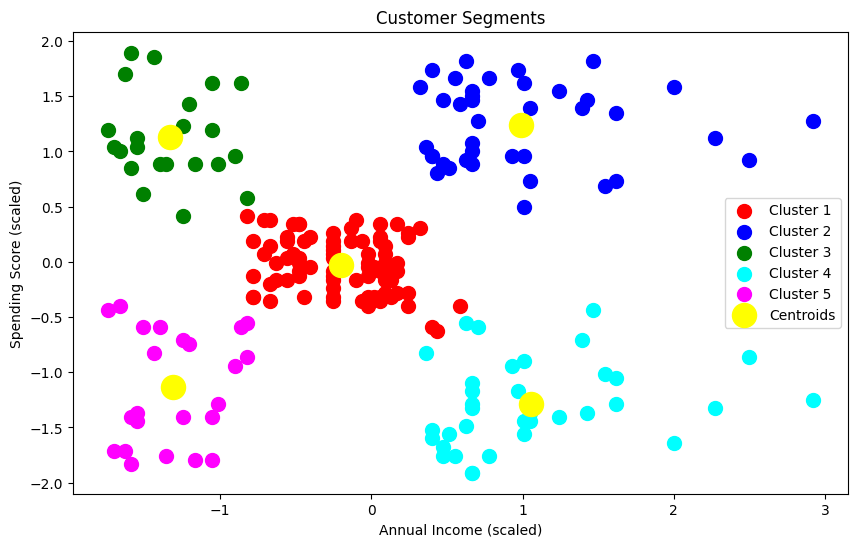

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[data['Cluster'] == 0, 0], scaled_features[data['Cluster'] == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_features[data['Cluster'] == 1, 0], scaled_features[data['Cluster'] == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_features[data['Cluster'] == 2, 0], scaled_features[data['Cluster'] == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_features[data['Cluster'] == 3, 0], scaled_features[data['Cluster'] == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(scaled_features[data['Cluster'] == 4, 0], scaled_features[data['Cluster'] == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [ ]:
cluster_summary = data.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Age': 'mean',
    'Gender': lambda x: x.value_counts().index[0]
})
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)        Age  Gender
Cluster                                                               
0                 55.296296               49.518519  42.716049  Female
1                 86.538462               82.128205  32.692308  Female
2                 25.727273               79.363636  25.272727  Female
3                 88.200000               17.114286  41.114286    Male
4                 26.304348               20.913043  45.217391  Female
